In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
from scipy.stats import norm
import os

In [2]:
names_hTERT = [
    'hTERT-TP2-R1',
    'hTERT-TP4-R1-1',
    'hTERT-TP4-R1-2',
    'hTERT-TP5-R1',
    'hTERT-TP6-R1'
]

names_PDL = [
    'PDL25-TP2-R1',
    'PDL33-TP4-R1',
    'PDL37-TP5-R1',
    'PDL46-TP6-R1'
]

In [3]:
#Testing
dataset = pd.read_csv('../Ranked/hTERT-TP4-R1-1hTERT-TP4-R1-2.tsv',sep='\t')
dataset2 = pd.read_csv('../Ranked/hTERT-TP2-R1hTERT-TP6-R1.tsv',sep='\t')
dataset.head()

,chrom,start,end,hTERT-TP4-R1-1,hTERT-TP4-R1-2,pen_dist,RankDiff
0,chrX,15750000,16000000,846,3383,1771.304230,2537
1,chrX,3000000,3250000,2017,4397,1666.716302,2380
2,chr5,171750000,172000000,597,2586,1380.736401,1989
3,chr5,750000,1000000,2486,655,1320.511671,-1831
4,chr5,156000000,156250000,9889,8014,1308.203709,-1875


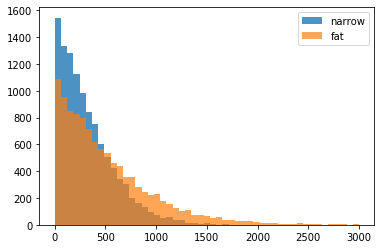

In [8]:
#Testing
x=dataset['RankDiff']
y=dataset2['RankDiff']
#ax=sns.distplot(x)
bins = np.linspace(0,3000,50)
plt.hist(np.absolute(x),bins=bins, alpha=0.8, label='narrow')
plt.hist(np.absolute(y),bins=bins, alpha=0.7, label='fat')
plt.legend()

In [45]:
# how many bins are there above a given threshold ...
# we are talking here about bins that demonstrate a "flip"-like behavior - 
# a "major" change in EV1 for a pair of samples ...

my_threshold = 800

print((x>my_threshold).sum())
print((y>my_threshold).sum())

580
1056


In [43]:
# given a number of bins we are looking at - where
# the dist thershold would be ...
number_of_bins = 2000

print(x.sort_values(ascending=False).iloc[number_of_bins])
print(y.sort_values(ascending=False).iloc[number_of_bins])

508.778588371176
614.8461560327802


1289.2200000000012
1267.1000000000058
1478.5900000000056
1779.6499999999996
1061.8600000000024
1355.0
1616.2900000000009
1353.0
1595.8700000000026
1402.4899999999998


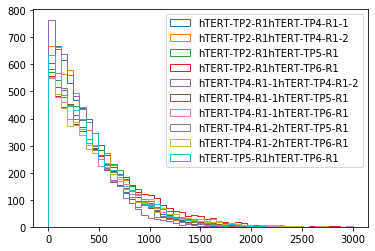

In [9]:
#hTERTS: .tsv files having Rankdiff and Rank is used
# Threshold based on Rankdiff
bins = np.linspace(0,3000,50)
for i in range(5):
    for j in range(i+1,5):
        df=pd.read_csv("../Ranked/"+names_hTERT[i]+names_hTERT[j]+'.tsv',sep='\t')
        x=df['RankDiff']
        plt.hist(x,bins=bins, histtype='step', label=names_hTERT[i]+names_hTERT[j])
        print(np.percentile(x, 99))
plt.legend()

In [20]:
for i in range(5):
    for j in range(i+1,5):
        dataset = pd.read_csv("../Ranked/"+names_hTERT[i]+names_hTERT[j]+'.tsv',sep='\t')
        x=dataset[np.absolute(dataset.RankDiff) > 1000]
        x.to_csv("temp.tsv",index=False,sep='\t')
        #generate a bed file having merged regions above threshold
        cmd= 'sort -k1,1 -k2,2n -i temp.tsv | bedtools merge -d 250000 > '+names_hTERT[i]+names_hTERT[j]+'.bed'
        os.system(cmd)

1020.0699999999997
1221.099999999995
1809.1399999999994
1039.1599999999962
1571.7800000000007
1521.239999999998


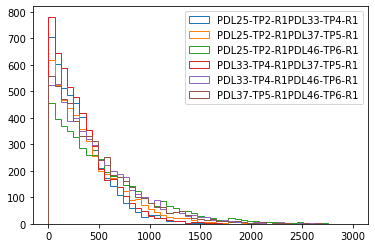

In [15]:
#PDLs
for i in range(4):
    for j in range(i+1,4):
        df=pd.read_csv("../Ranked/"+names_PDL[i]+names_PDL[j]+'.tsv',sep='\t')
        x=df['RankDiff']
        plt.hist(x,bins=bins, histtype='step', label=names_PDL[i]+names_PDL[j])
        print(np.percentile(x, 99))
plt.legend()

In [19]:
for i in range(4):
    for j in range(i+1,4):
        dataset = pd.read_csv("../Ranked/"+names_PDL[i]+names_PDL[j]+'.tsv',sep='\t')
        x=dataset[np.absolute(dataset.RankDiff) > 1000]
        x.to_csv("temp.tsv",index=False,sep='\t')
        cmd= 'sort -k1,1 -k2,2n -i temp.tsv | bedtools merge -d 250000 > '+names_PDL[i]+names_PDL[j]+'.bed'
        os.system(cmd)

2146.2400000000016
2457.4099999999926
2419.479999999994
2788.8799999999974
2990.219999999994
1903.7499999999982
2133.279999999999
2104.3900000000085
2510.2000000000044
2761.959999999999
1795.2000000000044
2093.339999999993
2014.7800000000007
2409.3899999999994
2580.8800000000047
1963.3100000000013
2063.8499999999985
2049.6799999999985
2200.6600000000035
2382.810000000012


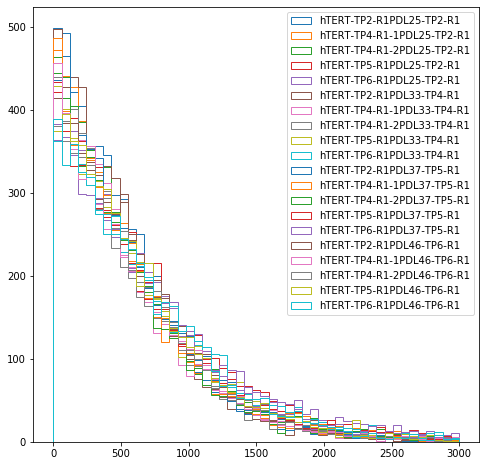

In [17]:
#all
plt.figure(figsize=(8,8))
for i in range(4):
    for j in range(5):
        df=pd.read_csv("../Ranked/"+names_hTERT[j]+names_PDL[i]+'.tsv',sep='\t')
        x=df['RankDiff']
        plt.hist(x,bins=bins, histtype='step', label=names_hTERT[j]+names_PDL[i])
        print(np.percentile(x, 99))
plt.legend()

In [21]:
#script to merge the chromosome regions above threshold, one bin dist is acceptable
for i in range(4):
    for j in range(5):
        dataset = pd.read_csv("../Ranked/"+names_hTERT[j]+names_PDL[i]+'.tsv',sep='\t')
        x=dataset[np.absolute(dataset.RankDiff) > 1750]
        x.to_csv("temp.tsv",index=False,sep='\t')
        cmd= 'sort -k1,1 -k2,2n -i temp.tsv | bedtools merge -d 250000 > '+names_hTERT[j]+names_PDL[i]+'.bed'
        os.system(cmd)

In [20]:
for i in range(5):
    for j in range(i+1,5):
        print(names_hTERT[i]+names_hTERT[j]+".bed ", end =" ")

hTERT-TP2-R1hTERT-TP4-R1-1.bed  hTERT-TP2-R1hTERT-TP4-R1-2.bed  hTERT-TP2-R1hTERT-TP5-R1.bed  hTERT-TP2-R1hTERT-TP6-R1.bed  hTERT-TP4-R1-1hTERT-TP4-R1-2.bed  hTERT-TP4-R1-1hTERT-TP5-R1.bed  hTERT-TP4-R1-1hTERT-TP6-R1.bed  hTERT-TP4-R1-2hTERT-TP5-R1.bed  hTERT-TP4-R1-2hTERT-TP6-R1.bed  hTERT-TP5-R1hTERT-TP6-R1.bed  

In [21]:
for i in range(4):
    for j in range(i+1,4):
        print(names_PDL[i]+names_PDL[j]+".bed ", end =" ")

PDL25-TP2-R1PDL33-TP4-R1.bed  PDL25-TP2-R1PDL37-TP5-R1.bed  PDL25-TP2-R1PDL46-TP6-R1.bed  PDL33-TP4-R1PDL37-TP5-R1.bed  PDL33-TP4-R1PDL46-TP6-R1.bed  PDL37-TP5-R1PDL46-TP6-R1.bed  

In [23]:
for i in range(4):
    for j in range(5):
        print(names_hTERT[j]+names_PDL[i]+".bed ", end =" ")

hTERT-TP2-R1PDL25-TP2-R1.bed  hTERT-TP4-R1-1PDL25-TP2-R1.bed  hTERT-TP4-R1-2PDL25-TP2-R1.bed  hTERT-TP5-R1PDL25-TP2-R1.bed  hTERT-TP6-R1PDL25-TP2-R1.bed  hTERT-TP2-R1PDL33-TP4-R1.bed  hTERT-TP4-R1-1PDL33-TP4-R1.bed  hTERT-TP4-R1-2PDL33-TP4-R1.bed  hTERT-TP5-R1PDL33-TP4-R1.bed  hTERT-TP6-R1PDL33-TP4-R1.bed  hTERT-TP2-R1PDL37-TP5-R1.bed  hTERT-TP4-R1-1PDL37-TP5-R1.bed  hTERT-TP4-R1-2PDL37-TP5-R1.bed  hTERT-TP5-R1PDL37-TP5-R1.bed  hTERT-TP6-R1PDL37-TP5-R1.bed  hTERT-TP2-R1PDL46-TP6-R1.bed  hTERT-TP4-R1-1PDL46-TP6-R1.bed  hTERT-TP4-R1-2PDL46-TP6-R1.bed  hTERT-TP5-R1PDL46-TP6-R1.bed  hTERT-TP6-R1PDL46-TP6-R1.bed  

In [ ]:
#command used to merge all chromsome regions (one 250kb bin apart are accepted) for every pairplot set
cat PDL25-TP2-R1PDL33-TP4-R1.bed  PDL25-TP2-R1PDL37-TP5-R1.bed  PDL25-TP2-R1PDL46-TP6-R1.bed  PDL33-TP4-R1PDL37-TP5-R1.bed  PDL33-TP4-R1PDL46-TP6-R1.bed  PDL37-TP5-R1PDL46-TP6-R1.bed  | sort -k1,1 -k2,2n | bedtools merge -d 250000 > merged-PDLs.bed